In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def w(u, v, x, y, T):
    cu = 1 if u != 0 else 1/np.sqrt(2)
    cv = 1 if v != 0 else 1/np.sqrt(2)
    theta = np.pi / (2*T)
    return cu * cv * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta)

In [3]:
def dct(img, width=8):
    H, W, ch = img.shape
    F = np.zeros(img.shape, dtype=np.float32)
    for c in range(ch):
        for sx in range(0, H, width):
            for sy in range(0, W, width):
                for i in range(width):
                    for j in range(width):
                        for x in range(width):
                            for y in range(width):
                                F[sx+i, sy+j, c] += 2/width * img[sx+x, sy+y, c] * w(i, j, x, y, width)
    return F

In [4]:
def idct(F, width=8, K=8):
    H, W, ch = F.shape
    f = np.zeros(img.shape, dtype=np.float32)
    for c in range(ch):
        for sx in range(0, H, width):
            for sy in range(0, W, width):
                for x in range(width):
                    for y in range(width):
                        for i in range(K):
                            for j in range(K):
                                f[sx+x, sy+y, c] += 2/width * F[sx+i, sy+j, c] * w(i, j, x, y, width)
    f = np.clip(f, 0, 255).astype("uint8")
    return f

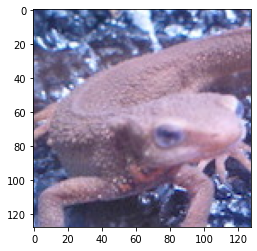

In [5]:
img = cv2.imread("../imori.jpg")
H, W, ch = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

F = dct(img)
output_img = idct(F).astype("uint8")

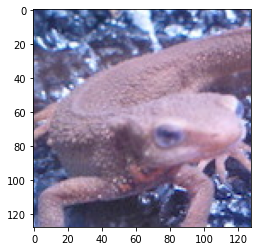

In [6]:
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()